<a href="https://colab.research.google.com/github/PlutoPranav/My_Codes/blob/main/END_SEM_TELUGU_HANDWRITING_RECOGNITION_TEAM12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
import pylab as pl

In [3]:
df = pd.read_csv("CSV_datasetsix_vowel_dataset_with_class.csv") #data set with grey pixels of images
df2=df.to_numpy() #converting dataframe to numpy array
dfnew=df2[:,0:784] 
dfnew2=dfnew.reshape(1200,28,28) #reshaping for displaying images
dflabel=df2[:,784:785]
dflabel.shape
#dflabel[402]

(1200, 1)

<Figure size 432x288 with 0 Axes>

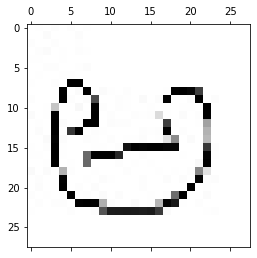

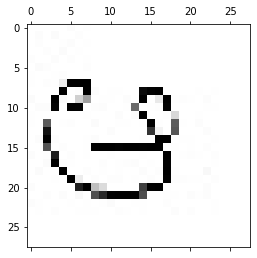

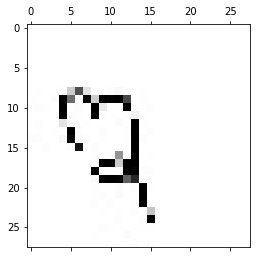

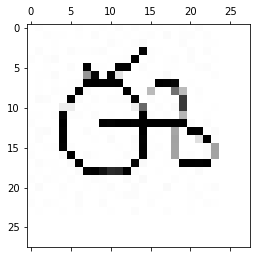

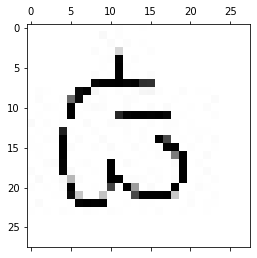

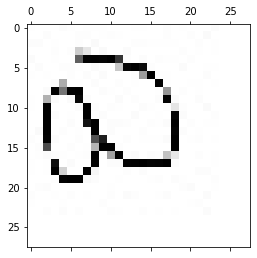

In [4]:
# Samples just for printing
pl.gray() 
pl.matshow(dfnew2[9])
pl.matshow(dfnew2[299])
pl.matshow(dfnew2[599])
pl.matshow(dfnew2[799])
pl.matshow(dfnew2[999])
pl.matshow(dfnew2[1199])
pl.show()

In [21]:
pix=[]
for i in range(784):
    pix.append('pixel'+str(i)) #getting pixels values into pix[]
features=pix 
X = df.loc[:, features].values  #extracting features into X
y = df.loc[:,'class'].values #extracting classes into Y
#Splitting Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)



##TRAINING THE MODEL: AND PRINTING ACCURACY OF TEST DATA

###LINEAR SVM

In [22]:
# SVM model for linear  kernel function
svm_model = svm.SVC(kernel = 'linear', C = 1, degree=3, gamma=2).fit(X_train, y_train) #training the model
#accuracy                                                         #feeding
accuracy = svm_model.score(X_test, y_test) 
print('Accuracy: ',accuracy*100)

Accuracy:  88.66666666666667


###POLYNOMIAL KERNEL SVM

In [32]:
# SVM model for polynomial kernel function
svmPOLY_model = svm.SVC(kernel = 'poly', C = 1, degree=3, gamma=2).fit(X_train, y_train) #training the model
#y_pred = svm_model.predict(X_test)
accuracy = svmPOLY_model.score(X_test, y_test)
print('Accuracy: ',accuracy*100)


Accuracy:  89.33333333333333


###GAUSSIAN(RBF) KERNEL SVM

In [24]:
# SVM model for linear  kernel function
svm_model = svm.SVC(kernel = 'rbf', C = 3, degree=3, gamma='scale').fit(X_train, y_train)
#y_pred = svm_model.predict(X_test)
#accuracy = svm_model.score(X_train, y_train)

accuracy = svm_model.score(X_test, y_test)
print('Accuracy: ',accuracy*100)

Accuracy:  91.66666666666666


##PRINTING ACCURACY FOR TRAINING DATA

In [25]:
accuracy = svm_model.score(X_train, y_train)
print('Accuracy: ',accuracy*100)

Accuracy:  100.0


In [26]:
# SVM model for RBF kernel Function
model_RBF = svm.SVC(degree=3, gamma='scale', kernel='rbf')  #radial basis function
model_RBF.fit(X_train, y_train)
#predict
accuracy = model_RBF.score(X_train, y_train)
print('Accuracy: ',accuracy*100)


Accuracy:  99.66666666666667


In [27]:
model_RBF.score(X_train,y_train)

0.9966666666666667

In [28]:
X_test.shape

(300, 784)

##MANUALLY SEEING IF THE PREDICTIONS ARE RIGHT

<Figure size 432x288 with 0 Axes>

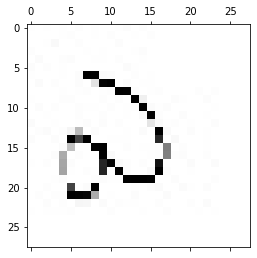

Letter is: YE ఎ


In [31]:
Xs=X_test.reshape(300,28,28) #RESHAPING
###image in the test case
pl.gray()
num=89; #this is for entering which test image you want to test
pl.matshow(Xs[num,:]) #This is to print the test set  
pl.show()


###predicton of the testcase
livepred1=model_RBF.predict(X_test[num:num+1,0:784]) #This part is the prediction of the test set
livepred1
if livepred1 == 1:
  print('Letter is: A అ') 
elif livepred1 == 2:
  print('Letter is: AAA   ఆ') 
elif livepred1 == 3:
  print('Letter is: E   ఇ') 
elif livepred1 == 4:
  print('Letter is: EEEE  ఈ') 
elif livepred1 == 5:
  print('Letter is: U  ఉ') 
elif livepred1 == 6:
  print('Letter is: YE ఎ') 
else:
  print('ERROR') 



In [36]:
from sklearn.metrics import classification_report
#predictions = svm_model.predict(X_test)
predictions = svm_model.predict(X_test) #LINEAR SVM
#predictions = svmPOLY_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.87      0.88      0.87        59
           2       0.96      0.91      0.93        47
           3       0.87      0.98      0.92        47
           4       0.94      0.96      0.95        51
           5       0.98      0.85      0.91        53
           6       0.91      0.93      0.92        43

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [35]:
predictions1 = svmPOLY_model.predict(X_test)
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           1       0.79      0.85      0.82        59
           2       0.91      0.91      0.91        47
           3       0.90      0.94      0.92        47
           4       0.96      0.92      0.94        51
           5       0.92      0.87      0.89        53
           6       0.90      0.88      0.89        43

    accuracy                           0.89       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.89      0.89       300



In [37]:
predictions2 = model_RBF.predict(X_test)
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           1       0.83      0.85      0.84        59
           2       0.93      0.91      0.92        47
           3       0.88      0.98      0.93        47
           4       0.92      0.96      0.94        51
           5       0.96      0.83      0.89        53
           6       0.93      0.93      0.93        43

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

